# Smoke Detection

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [15]:
df_raw=pd.read_csv('smoke_detection_iot.csv')

In [16]:
df=df_raw.copy()

In [17]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [18]:
df.drop(['Unnamed: 0','UTC'],axis=1,inplace=True)

In [19]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## DATA PROCESSING

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  CNT             62630 non-null  int64  
 13  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 6.7 MB


In [21]:
df.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [22]:
df.nunique()

Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
CNT               24994
Fire Alarm            2
dtype: int64

In [23]:
df.drop('CNT',axis=1,inplace=True)

In [24]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature[C],62630.0,15.970424,14.359576,-22.010,10.99425,20.130,25.4095,59.930
Humidity[%],62630.0,48.539499,8.865367,10.740,47.53000,50.150,53.2400,75.200
TVOC[ppb],62630.0,1942.057528,7811.589055,0.000,130.00000,981.000,1189.0000,60000.000
eCO2[ppm],62630.0,670.021044,1905.885439,400.000,400.00000,400.000,438.0000,60000.000
Raw H2,62630.0,12942.453936,272.464305,10668.000,12830.00000,12924.000,13109.0000,13803.000
Raw Ethanol,62630.0,19754.257912,609.513156,15317.000,19435.00000,19501.000,20078.0000,21410.000
Pressure[hPa],62630.0,938.627649,1.331344,930.852,938.70000,938.816,939.4180,939.861
PM1.0,62630.0,100.594309,922.524245,0.000,1.28000,1.810,2.0900,14333.690
PM2.5,62630.0,184.467770,1976.305615,0.000,1.34000,1.880,2.1800,45432.260
NC0.5,62630.0,491.463608,4265.661251,0.000,8.82000,12.450,14.4200,61482.030


## EDA

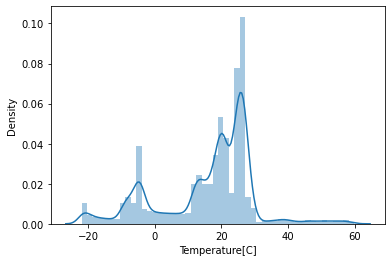

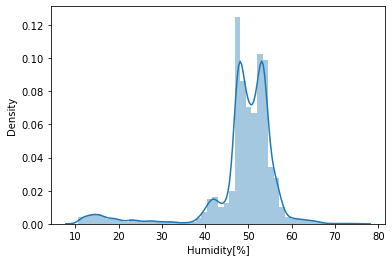

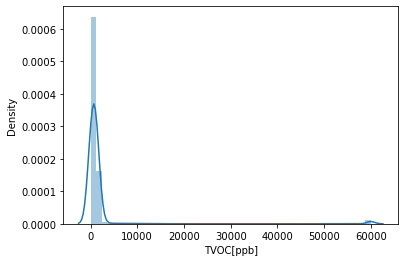

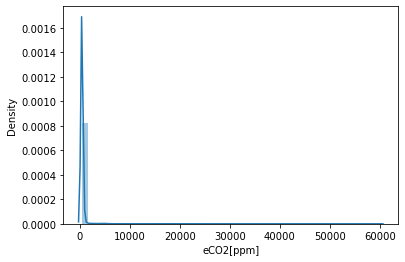

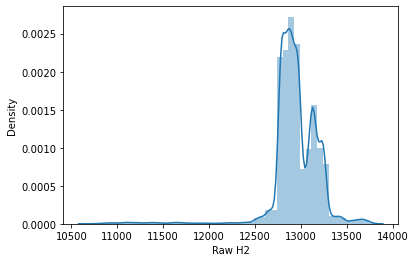

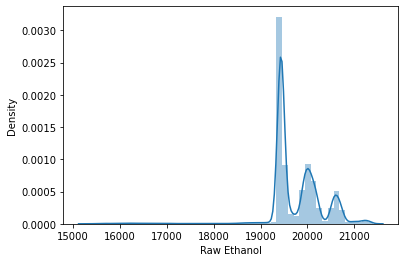

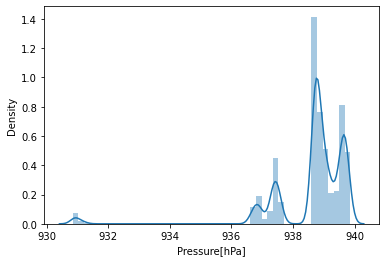

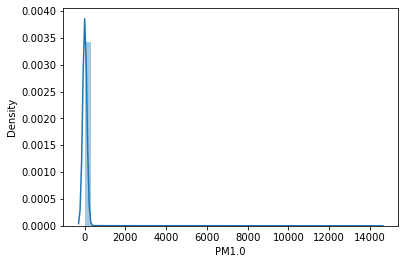

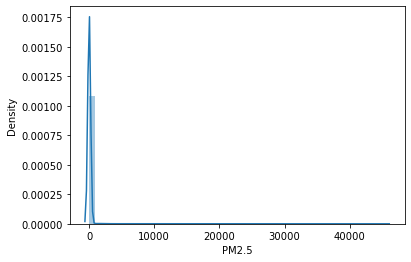

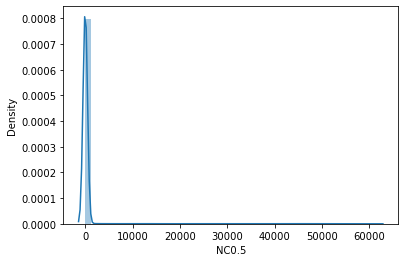

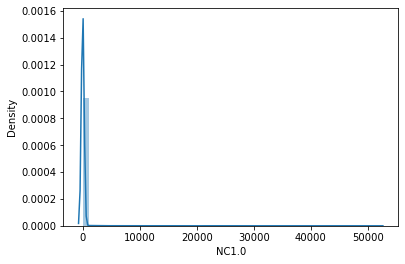

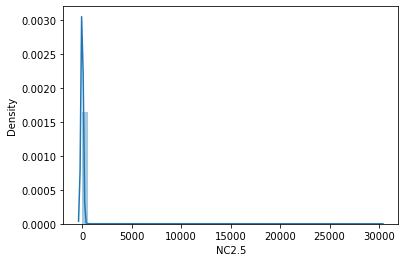

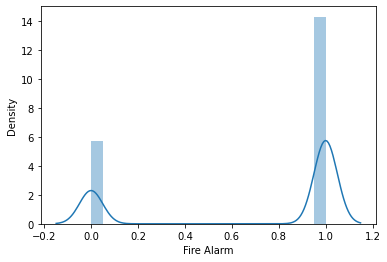

In [26]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:xlabel='Fire Alarm', ylabel='count'>

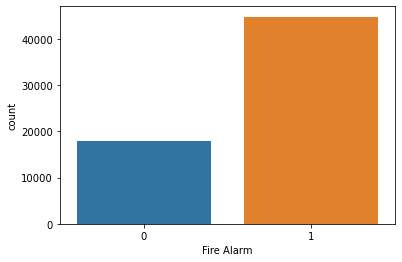

In [27]:
sns.countplot(df['Fire Alarm'])

In [30]:
X=df.drop('Fire Alarm',axis=1)
y=df['Fire Alarm']

## Balencing the Data

## Over-sampling: SMOTE

In [33]:
from imblearn.combine import SMOTETomek
st=SMOTETomek(sampling_strategy='all')

In [34]:
X_smt,y_smt=st.fit_resample(X,y)

<AxesSubplot:xlabel='Fire Alarm', ylabel='count'>

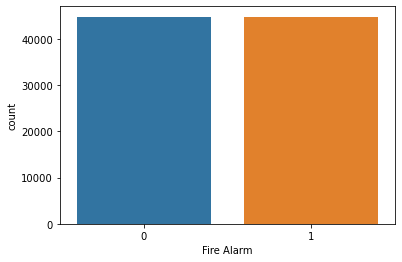

In [35]:
sns.countplot(y_smt)

## Split Data

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.33, random_state=42)

## Standardization

In [39]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()

In [40]:
X_train=Sc.fit_transform(X_train)
X_test=Sc.transform(X_test)

## Model

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [44]:
M1=LogisticRegression()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('classification_report:\n',classification_report(y_test,P1))
print('\n')
print('confusion_matrix:\n',confusion_matrix(y_test,P1))
print('\n')
print('acc:\n',accuracy_score(y_test,P1)*100)
print('\n')
print('ROC:\n',roc_auc_score(y_test,P1))

classification_report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     14789
           1       0.92      0.90      0.91     14750

    accuracy                           0.91     29539
   macro avg       0.91      0.91      0.91     29539
weighted avg       0.91      0.91      0.91     29539



confusion_matrix:
 [[13572  1217]
 [ 1518 13232]]


acc:
 90.74105419953283


ROC:
 0.9073969269418063


## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
M2=DecisionTreeClassifier()
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('classification_report:\n',classification_report(y_test,P2))
print('\n')
print('confusion_matrix:\n',confusion_matrix(y_test,P2))
print('\n')
print('acc:\n',accuracy_score(y_test,P2)*100)
print('\n')
print('ROC:\n',roc_auc_score(y_test,P2))

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14789
           1       1.00      1.00      1.00     14750

    accuracy                           1.00     29539
   macro avg       1.00      1.00      1.00     29539
weighted avg       1.00      1.00      1.00     29539



confusion_matrix:
 [[14788     1]
 [    2 14748]]


acc:
 99.9898439351366


ROC:
 0.9998983944778015


## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
M3=RandomForestClassifier()
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print('classification_report:\n',classification_report(y_test,P3))
print('\n')
print('confusion_matrix:\n',confusion_matrix(y_test,P3))
print('\n')
print('acc:\n',accuracy_score(y_test,P3)*100)
print('\n')
print('ROC:\n',roc_auc_score(y_test,P3))

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14789
           1       1.00      1.00      1.00     14750

    accuracy                           1.00     29539
   macro avg       1.00      1.00      1.00     29539
weighted avg       1.00      1.00      1.00     29539



confusion_matrix:
 [[14789     0]
 [    3 14747]]


acc:
 99.9898439351366


ROC:
 0.9998983050847458
